# Libraries used

Running Kernel3.9.13 base anaconda

pip install squarify
pip install yellowbrick
pip install plotly
pip install seaborn
pip install lazypredict
pip install pandas_profiling

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns  
import matplotlib.pyplot as plt
import plotly.io as pio
#import squarify #treemap
import os
import matplotlib
import warnings

from imblearn.over_sampling import SMOTE


#to enable the inline plotting
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

sns.set_style("darkgrid")

In [2]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import classification_report

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
#rfc using regularization and gridsearch to find the best parameters for the model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import IncrementalPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from scipy.stats import normaltest

from pandas_profiling import ProfileReport

from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.style.palettes import PALETTES, SEQUENCES, color_palette

import lazypredict
from lazypredict.Supervised import LazyClassifier


warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Function for EDA. Using the display() function to have  well-formatted tables. We are mainly using pandas to explore the datasets

def dataset_description(df_target):

    print('This is the Dataset shape: %s\n' % (df_target.shape, ))
    print('Dataset columns: %s\n' % df_target.columns)

    print('\nColumns description:\n')
    display(df_target.info())
    display(df_target.describe())  # describe the dataset

    print('\nNull values:\n')
    display(df_target.isnull().sum())  # Identify null values

#function performing a quick check on df_inspection to have best of pandas functions separated by a line
def quick_check(dataframe):
    print('First 5 rows %s\n')
    print(dataframe.head(2))
    print("=====================================")
    print('Dataframe shape %s\n')
    print(dataframe.shape)
    print("=====================================")
    print('Dataframe describe categorical %s\n')
    print(dataframe.describe(include=['O']))
    print("=====================================")
    print('Dataframe null values %s\n')
    print(dataframe.isnull().sum())
    print("=====================================")
    print('Dataframe value counts %s\n')
    print(dataframe.value_counts())
    print("=====================================")

#stats function
def stats(dataframe):
    print('Dataframe correlation %s\n')
    print(dataframe.corr())
    print("=====================================")
    print('Dataframe covariance %s\n')
    print(dataframe.cov())
    print("=====================================")
    print('Dataframe skew %s\n')
    print(dataframe.skew())
    print("=====================================")
    print('Dataframe kurtosis %s\n')
    print(dataframe.kurt())
    print("=====================================")

#create a function to normalize characters from a dataset's column in Spanish
def normalize_characters(df, column):
    df[column] = df[column].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
    df[column] = df[column].str.lower()
    df[column] = df[column].str.replace('á', 'a')
    df[column] = df[column].str.replace('é', 'e')
    df[column] = df[column].str.replace('í', 'i')
    df[column] = df[column].str.replace('ó', 'o')
    df[column] = df[column].str.replace('ú', 'u')
    df[column] = df[column].str.replace('ñ', 'n')
    df[column] = df[column].str.replace('ü', 'u')
    df[column] = df[column].str.replace('ç', 'c')
    df[column] = df[column].str.replace('(', '')
    df[column] = df[column].str.replace(')', '')
    df[column] = df[column].str.replace('\'', '')
    df[column] = df[column].str.replace('´', '')
    df[column] = df[column].str.replace('`', '')
    df[column] = df[column].str.replace('’', '')
    return df.head(2)

#create function to change detypes in64 to int32 in a df
def change_dtypes(df):
    for col in df.columns:
        if df[col].dtype == 'int64':
            df[col] = df[col].astype('int32')
        elif df[col].dtype == 'float64':
            df[col] = df[col].astype('float32')
    return df

def outlier_function(df, col_name):
    """ this function detects first and third quartile and interquartile range for a given column of a dataframe
    then calculates upper and lower limits to determine outliers conservatively
    returns the number of lower and uper limit and number of outliers respectively"""
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                        
    upper_limit = third_quartile+(3*IQR)
    lower_limit = first_quartile-(3*IQR)
    outlier_count = 0
                    
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
        else:
            pass
    return lower_limit, upper_limit, outlier_count

In [4]:
#show all print outputs when using a function
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#display all columns
pd.set_option('display.max_columns', None)


# Importing previous dataset

In [5]:
#point to the folder where the data is stored
os.chdir(r"C:\Users\pedro\datathon")

# Loading combined_mod dataset
train_consolidated = pd.read_csv('df_baseline.csv')
sample_submission = pd.read_csv('submission_sample_prepared2.csv')


In [6]:
train_consolidated = train_consolidated[sample_submission.columns]

In [7]:
#input null values in sample_submission with mean of the column
sample_submission['Yearly Sun Hours (hours)'] = sample_submission['Yearly Sun Hours (hours)'].fillna(sample_submission['Yearly Sun Hours (hours)'].mean())

In [8]:
train_consolidated.head(1)

,PipeId,Incidence,Diameter,Length,Pressure,NumConnections,aspect,Relative_Thickness,area_connection,gas_natural,Material_Acrylonitrile-Butadiene-Styrene,Material_Copper,Material_Fiberglass-Reinforced Plastic,Material_Polyethylene,Material_Polypropylene,Yearly Sun Hours (hours),Average_MonthsLastRev,MonthsLastRev,No_Inspections,No_Incidences_Total,Age_pipe_at_inspection,Population density (persons/sqkm)
0,489616,0,0.09,0.08,0.02,0.00,0.05,0.01,0.00,1,0,0,0,1,0,0.71,0.28,0.41,0.00,0.00,0.02,0.02


In [9]:
#creating a subset for altering the dataset after initial EDA
df_baseline = train_consolidated.copy()


In [10]:
df_baseline.head(1)

,PipeId,Incidence,Diameter,Length,Pressure,NumConnections,aspect,Relative_Thickness,area_connection,gas_natural,Material_Acrylonitrile-Butadiene-Styrene,Material_Copper,Material_Fiberglass-Reinforced Plastic,Material_Polyethylene,Material_Polypropylene,Yearly Sun Hours (hours),Average_MonthsLastRev,MonthsLastRev,No_Inspections,No_Incidences_Total,Age_pipe_at_inspection,Population density (persons/sqkm)
0,489616,0,0.09,0.08,0.02,0.00,0.05,0.01,0.00,1,0,0,0,1,0,0.71,0.28,0.41,0.00,0.00,0.02,0.02


In [11]:
#count values for Incidence
df_baseline['Incidence'].value_counts()


0    4525778
1       4642
Name: Incidence, dtype: int64

# PCA approach


In [12]:
# perform pca on df_baseline and split the data into train and test 80 20stratifying by the target variable Incidence stratify=y
pca = PCA(n_components=17, random_state=42)
X = df_baseline.drop(['Incidence'], axis=1)
y = df_baseline['Incidence']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [13]:
X_train.dtypes

PipeId                                        int64
Diameter                                    float64
Length                                      float64
Pressure                                    float64
NumConnections                              float64
aspect                                      float64
Relative_Thickness                          float64
area_connection                             float64
gas_natural                                   int64
Material_Acrylonitrile-Butadiene-Styrene      int64
Material_Copper                               int64
Material_Fiberglass-Reinforced Plastic        int64
Material_Polyethylene                         int64
Material_Polypropylene                        int64
Yearly Sun Hours (hours)                    float64
Average_MonthsLastRev                       float64
MonthsLastRev                               float64
No_Inspections                              float64
No_Incidences_Total                         float64
Age_pipe_at_

# Trying model 

In [14]:
#rfc model on pca data performing cross validation and kfold with 5 splits over a list of parameters
rfc = RandomForestClassifier(random_state=42, n_jobs=-1, verbose=1)
param_grid = {
    'n_estimators': [100, 200],
    'max_features': ['auto'],
    'max_depth' : [4,5],
    'criterion' :['entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 3)
CV_rfc.fit(X_train_pca, y_train)
CV_rfc.best_params_



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   50.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.2min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   46.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.1min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   46.4s
[Parallel(n_jobs=-1)]:

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(n_jobs=-1, random_state=42,
                                              verbose=1),
             param_grid={'criterion': ['entropy'], 'max_depth': [4, 5],
                         'max_features': ['auto'], 'n_estimators': [100, 200]})

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 100}

In [16]:
y_pred = CV_rfc.predict(X_test_pca)
print(classification_report(y_test, y_pred))


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.9s finished


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    905156
           1       0.00      0.00      0.00       928

    accuracy                           1.00    906084
   macro avg       0.50      0.50      0.50    906084
weighted avg       1.00      1.00      1.00    906084



#rfc model on pca data and classification report to evaluate the model performance on the test set 
rfc = RandomForestClassifier(n_estimators=100, random_state=42, verbose=1, n_jobs=-1, max_depth=2) 
rfc.fit(X_train_pca, y_train)
y_pred = rfc.predict(X_test_pca)
print(classification_report(y_test, y_pred))



[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.0s finished


array([0.00035667, 0.00057433, 0.00067733, ..., 0.00079618, 0.00037245,
       0.00107816])

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'RFC ROC Curve')

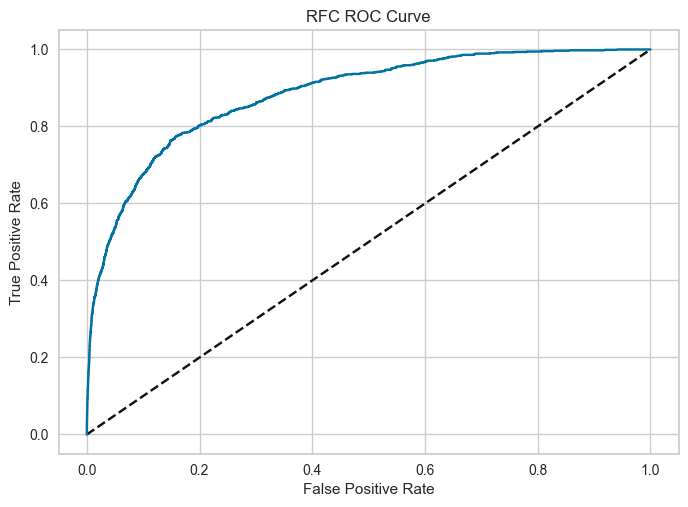

In [17]:
#use rfc model to predict probabilites on pca test
y_pred_proba = CV_rfc.predict_proba(X_test_pca)[:,1]
y_pred_proba

#plot roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='RFC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RFC ROC Curve')
plt.show()



In [18]:
#drop incidence in sample_submission
sample_submission = sample_submission.drop('Incidence', axis=1)

In [19]:
#use rfc model to predict probabilites on sample_submission converting it first to pca with 2 components random_state=42
sample_submission_pca = pca.transform(sample_submission)
y_pred_proba = CV_rfc.predict_proba(sample_submission_pca)[:,1]
y_pred_proba

#add the predicted probabilities to the sample_submission dataframe
sample_submission['Incidence'] = y_pred_proba
sample_submission.head(1)





[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.9s finished


array([0.0003853 , 0.00036598, 0.00039982, ..., 0.00035105, 0.00031547,
       0.00068101])

,PipeId,Diameter,Length,Pressure,NumConnections,aspect,Relative_Thickness,area_connection,gas_natural,Material_Acrylonitrile-Butadiene-Styrene,Material_Copper,Material_Fiberglass-Reinforced Plastic,Material_Polyethylene,Material_Polypropylene,Yearly Sun Hours (hours),Average_MonthsLastRev,MonthsLastRev,No_Inspections,No_Incidences_Total,Age_pipe_at_inspection,Population density (persons/sqkm),Incidence
0,446859944,0.17,0.01,0.00,0.00,0.00,0.03,0.00,1.00,0,0,0,1,0,0.83,0.75,0.76,0.36,0.00,0.26,0.28,0.00


In [20]:
#drop all columns except PipeId and Incidence in submission2 creating kaggle_submission
kaggle_submission = sample_submission.drop(['Diameter', 'Length', 'Pressure', 'NumConnections', 'aspect',
       'Relative_Thickness', 'area_connection', 'gas_natural',
       'Material_Acrylonitrile-Butadiene-Styrene', 'Material_Copper',
       'Material_Fiberglass-Reinforced Plastic', 'Material_Polyethylene',
       'Material_Polypropylene', 'Yearly Sun Hours (hours)',
       'Average_MonthsLastRev', 'MonthsLastRev', 'No_Inspections',
       'No_Incidences_Total', 'Age_pipe_at_inspection',
       'Population density (persons/sqkm)'], axis=1)


In [21]:
kaggle_submission.head(2)

,PipeId,Incidence
0,446859944,0.00
1,428124500,0.00


In [22]:
kaggle_submission.shape

(909733, 2)

In [23]:
sample_submission.head(1)

,PipeId,Diameter,Length,Pressure,NumConnections,aspect,Relative_Thickness,area_connection,gas_natural,Material_Acrylonitrile-Butadiene-Styrene,Material_Copper,Material_Fiberglass-Reinforced Plastic,Material_Polyethylene,Material_Polypropylene,Yearly Sun Hours (hours),Average_MonthsLastRev,MonthsLastRev,No_Inspections,No_Incidences_Total,Age_pipe_at_inspection,Population density (persons/sqkm),Incidence
0,446859944,0.17,0.01,0.00,0.00,0.00,0.03,0.00,1.00,0,0,0,1,0,0.83,0.75,0.76,0.36,0.00,0.26,0.28,0.00


In [24]:
#export kaggle_submission to csv
os.chdir(r"C:\Users\pedro\datathon")

kaggle_submission.to_csv('kaggle_submission_new_features_pca17_rfcv.csv', index=False)